In [361]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import operator
import re
import nltk
from PIL import Image
from os import path
import random
from wordcloud import WordCloud, STOPWORDS
import csv
from itertools import izip
import os
import glob
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfTransformer
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from scipy.cluster import hierarchy
from sklearn.neural_network import MLPClassifier
from sklearn import linear_model

In [2]:
def getBooks():
    return glob.glob("*.txt")

In [3]:
# Make it so all the returned text is also lowercase
def getWords(text):
    return re.compile('\w+').findall(text)

In [4]:
def WordCloudMaker(bookName):    
    text = open(bookName).read()
    wc = WordCloud().generate(text)
    default_colors = wc.to_array()
    plt.imshow(default_colors, interpolation="bilinear")
    plt.axis("off")
    plt.title(bookName)
    plt.show()

In [225]:
# Converts book in text file to a csv
def book2csv(bookName):
    fdist = nltk.FreqDist()
    stopWords = stopwords.words("english")
    data = []
    words = []
    
    # Stores each line of text file into a list
    with open(bookName, 'r') as bookFile:
        fullText = bookFile.readlines()

    # Tokenizes lines and adds each word into a list
    for line in fullText:
        temp = getWords(line.lower())
        words.extend(temp)

    # Removes words in stop words list
    words = [w for w in words if not w in stopWords]
    
    # Counts word frequency and stores in dictionary
    for word in words:
        fdist[word] += 1
    
    # Plot Cumlative word distribution
    fdist.plot(40, cumulative=True)
    
    # Write word and frequency to csv
    with open("holder.csv", "wb") as tempFile:
        writer = csv.writer(tempFile)
        for word in fdist.most_common():
            writer.writerow(word)
    
    # Rewrite csv file into proper format
    a = izip(*csv.reader(open("holder.csv", "rb")))
    csv.writer(open(bookName + ".csv", "wb")).writerows(a)
    os.remove("holder.csv")

In [226]:
# Merges word list from every book into csv file
def csvMerger(bookList):  
    words = []

    # Creates list of words from every book csv
    for book in bookList:
        with open(book + ".csv", "rb") as inputFile:
            csvReader = csv.reader(inputFile)
            inputWords = next(csvReader)
            for word in inputWords:
                    words.append(word)

    with open("TotalWordList.csv", "wb") as outFile:
        writer = csv.DictWriter(outFile, fieldnames=words, restval = 0)
        
        # Turns list of words to 1 string
        wordString = str(words)
        # Removes extraneous symbols
        wordString = wordString.replace("'","").replace("[","").replace("]","").replace(".","")
        # Writes string to csv as word headers
        outFile.write(wordString + "\n") 
        
        # Writes count for word from each book
        for book in bookList:
            with open(book + ".csv", "rb") as inputFile:
                csvReader = csv.DictReader(inputFile)
                for row in csvReader:
                    writer.writerow(row)

In [227]:
def TransposeCSV(bookName):
    a = izip(*csv.reader(open(bookName + ".csv", "rb")))
    csv.writer(open("transpose" + bookName + ".csv", "wb")).writerows(a)

In [229]:
bookList

['C-InfiniteJest.txt',
 'C-MagicKingdom.txt',
 'C-Martian.txt',
 'CP-Metrophage.txt',
 'CP-NeuroMancer.txt',
 'CP-Snowcrash.txt',
 'GA-iRobot.txt',
 'GA-MartianChronicles.txt',
 'GA-Triplanetary.txt',
 'NW-AndroidSheep.txt',
 'NW-Dune.txt',
 'NW-SlaughterHouseFive.txt']

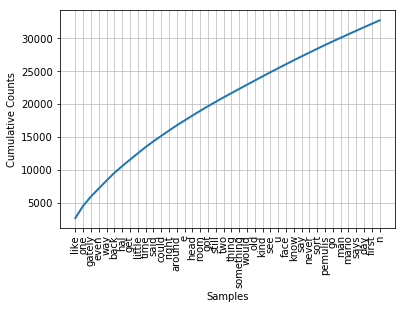

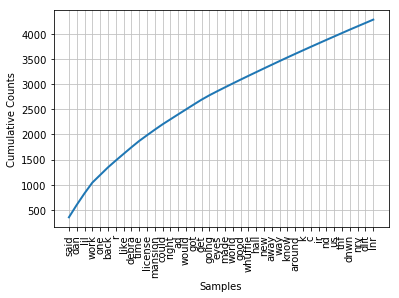

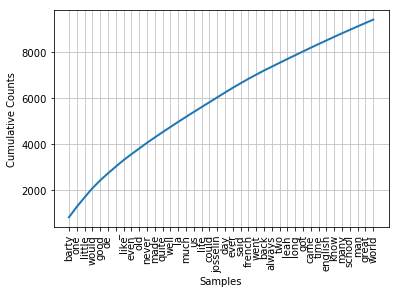

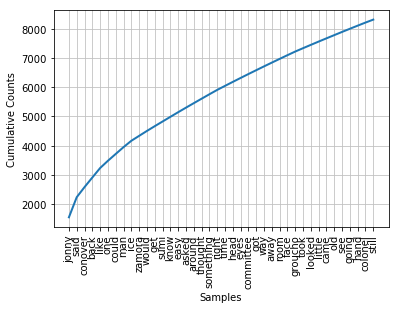

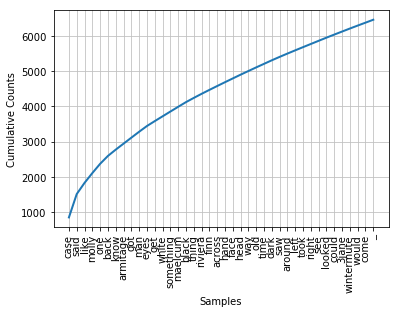

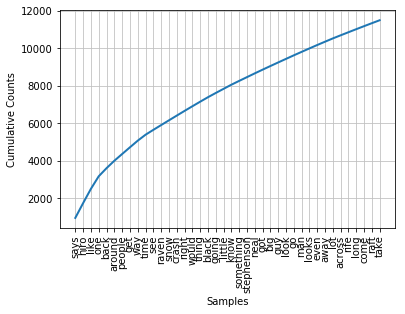

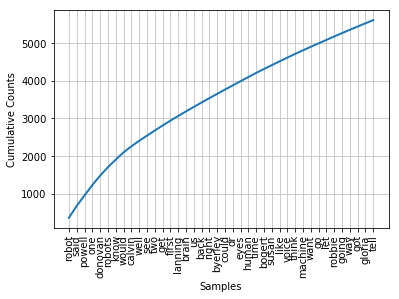

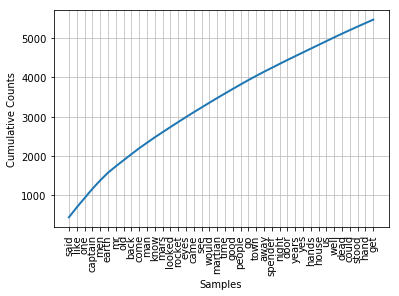

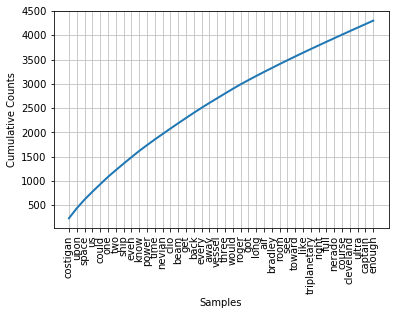

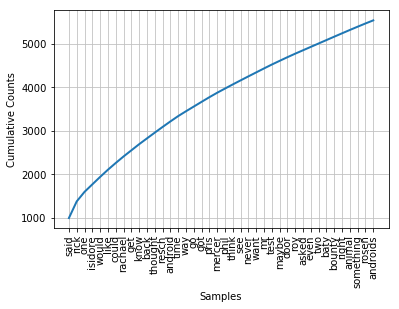

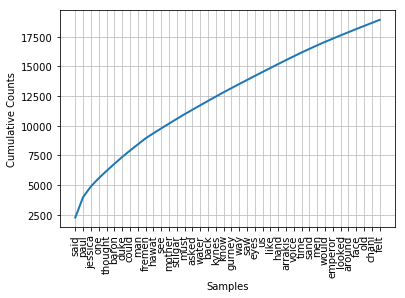

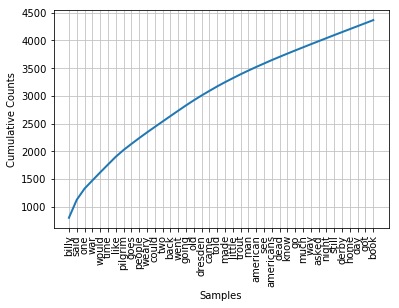

In [228]:
# Get List of books
bookList = getBooks()

# Convert each book to csv
for bookname in bookList:
    book2csv(bookname)
    TransposeCSV(bookname)

# Create csv of all words
csvMerger(bookList)

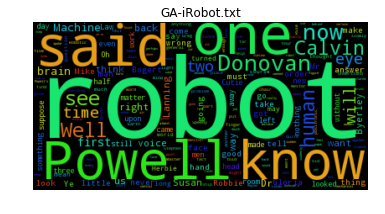

In [395]:
# runs word cloud maker
WordCloudMaker("GA-iRobot.txt")

In [336]:
# Read words are numpy array
fulltext = np.loadtxt('wordCount.csv', delimiter=",",dtype='int')
fulltext = np.transpose(fulltext)
wordlist = np.loadtxt('wordList.csv', delimiter=",",dtype='str')
eras = np.loadtxt('bookEra.csv', delimiter=",",dtype='str')

# Break text into genres
contemp = fulltext[:,0:3]
cyber = fulltext[:, 3:6]
golden = fulltext[:, 6:9]
wave = fulltext[:, 9:]

[[2698  132  283]
 [1843  151  451]
 [1422    0    0]
 ..., 
 [   6    0    1]
 [   1    0    3]
 [  16    1    0]]


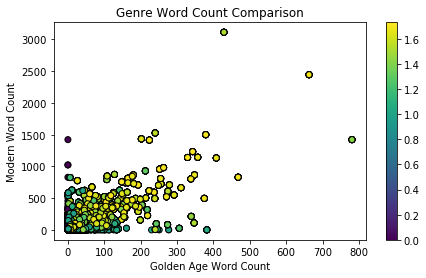

In [364]:
go = golden.sum(axis=1)
m = contemp.sum(axis=1)

# TD-IDF Normalization
transformer = TfidfTransformer(smooth_idf=False)
tfidf = transformer.fit_transform(golden)
tfidf = tfidf.toarray()
tfidf = tfidf.sum(axis=1)

# PLot scatter graph
figure = plt.figure(figsize=(7, 4))
plt.scatter(go, m, c=tfidf, edgecolors="black");
plt.title("Genre Word Count Comparison")
plt.xlabel("Golden Age Word Count")
plt.ylabel("Modern Word Count")
plt.colorbar()

In [381]:
# Read data for supervised learning
X = pd.read_csv('TotalWordList.csv')
y = pd.read_csv("bookEra.csv")
y = y["Era"]

# Normalize Data
X_norm = (X - X.mean()) / (X.max() - X.min())

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_norm, y, test_size=0.30)

print y_test

8    3
0    1
3    2
9    4
Name: Era, dtype: int64


In [390]:
# list of prediction algorithms
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", 
         "Decision Tree", "Random Forest", "AdaBoost",
         "Neural Network", "Linear Regression", "logistic regression"]

# Prediction algorithms correspoding code
classifiers = [
    KNeighborsClassifier(2),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=80),
    RandomForestClassifier(max_depth=80, n_estimators=100, max_features=100),
    AdaBoostClassifier(),
    MLPClassifier(solver='sgd', hidden_layer_sizes=(7, 4), learning_rate_init=0.01),
    linear_model.LinearRegression(),
    linear_model.LogisticRegression()]

# Trains, tests testing data, checks accuracy
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print name, "accuracy:", score

Nearest Neighbors accuracy: 0.25
Linear SVM accuracy: 0.25
RBF SVM accuracy: 0.25
Decision Tree accuracy: 0.25
Random Forest accuracy: 0.5
AdaBoost accuracy: 0.25
Neural Network accuracy: 0.5
Linear Regression accuracy: 0.354452927209
logistic regression accuracy: 0.25
